Enter your username (firstname):  stephanie
Enter your matriculation number:  009



Welcome, Stephanie!
Displaying original image...



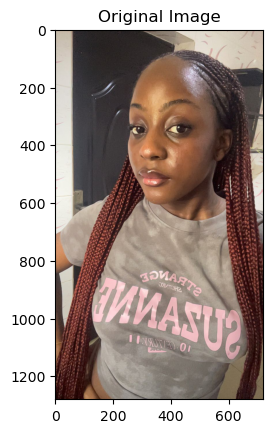


Available enhancement techniques:
1. Greyscale
2. Brightness
3. Sharpen
4. Noise Reduction
5. Scaling
6. Inverse


Enter the technique name (or type 'exit' to quit):  brightness


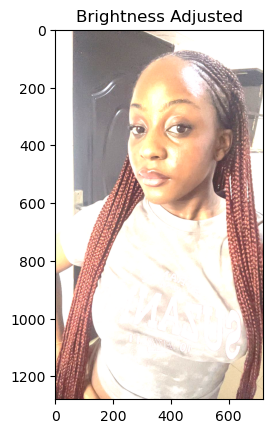


Available enhancement techniques:
1. Greyscale
2. Brightness
3. Sharpen
4. Noise Reduction
5. Scaling
6. Inverse


Enter the technique name (or type 'exit' to quit):  exit


In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# List of student details
usernames = ["adaobi", "bimpe", "bonaventure", "chisom", "clement", "daniel", "karol", "munachi", "precious", "stephanie"]
matric_numbers = ["000", "001", "002", "003", "004", "005", "006", "007", "008", "009"]
image_files = ["Images/adaobi.jpeg", "Images/bimpe.jpeg", "Images/bonaventure.jpeg", "Images/chisom.jpeg", "Images/clement.jpeg", "Images/daniel.jpeg", "Images/karol.jpeg", "Images/munachi.jpeg", "Images/precious.jpeg", "Images/stephanie.jpeg"]

# Function to use enhancement techniques
def enhancement_techniques(technique, image_path):
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Image not found.")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

    if technique == 'greyscale':
        enhanced = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        plt.imshow(enhanced, cmap='gray')
        plt.title("Greyscale")
    
    elif technique == 'brightness':
        brightness = 50
        contrast = 1.5
        enhanced = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)
        plt.imshow(enhanced)
        plt.title("Brightness Adjusted")

    elif technique == 'sharpen':
        kernel = np.array([[0,-1,0], [-1,5,-1],[0,-1,0]])
        enhanced = cv2.filter2D(image, -1, kernel)
        plt.imshow(enhanced)
        plt.title("Sharpened")

    elif technique == 'noise reduction':
        enhanced = cv2.medianBlur(image, 15)
        plt.imshow(enhanced)
        plt.title("Noise Reduction (Median Blur)")

    elif technique == 'scaling':
        enhanced = cv2.resize(image, None, fx=1.5, fy=1.5)
        plt.imshow(enhanced)
        plt.title("Scaled Image")

    elif technique == 'inverse':
        enhanced = 255 - image
        plt.imshow(enhanced)
        plt.title("Inverted Colors")

    else:
        print("Invalid input.")
        return
    
    plt.axis("on")  
    plt.show()


def process_image():
    username = input("Enter your username (firstname): ").strip().lower()
    matno = input("Enter your matriculation number: ").strip()

    if username in usernames and matno in matric_numbers:
        index = usernames.index(username)
        image_path = image_files[index]

        print(f"\nWelcome, {username.capitalize()}!")
        print(f"Displaying original image...\n")

        
        original_image = cv2.imread(image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.axis("on")
        plt.show()

        while True:
            print("\nAvailable enhancement techniques:")
            print("1. Greyscale\n2. Brightness\n3. Sharpen\n4. Noise Reduction\n5. Scaling\n6. Inverse")
            choice = input("Enter the technique name (or type 'exit' to quit): ").strip().lower()

            if choice == "exit":
                break
            enhancement_techniques(choice, image_path)
    else:
        print("Invalid username or matriculation number.")

# Run the program
process_image()
